/tmp/ipykernel_72754/1896134460.py:63: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


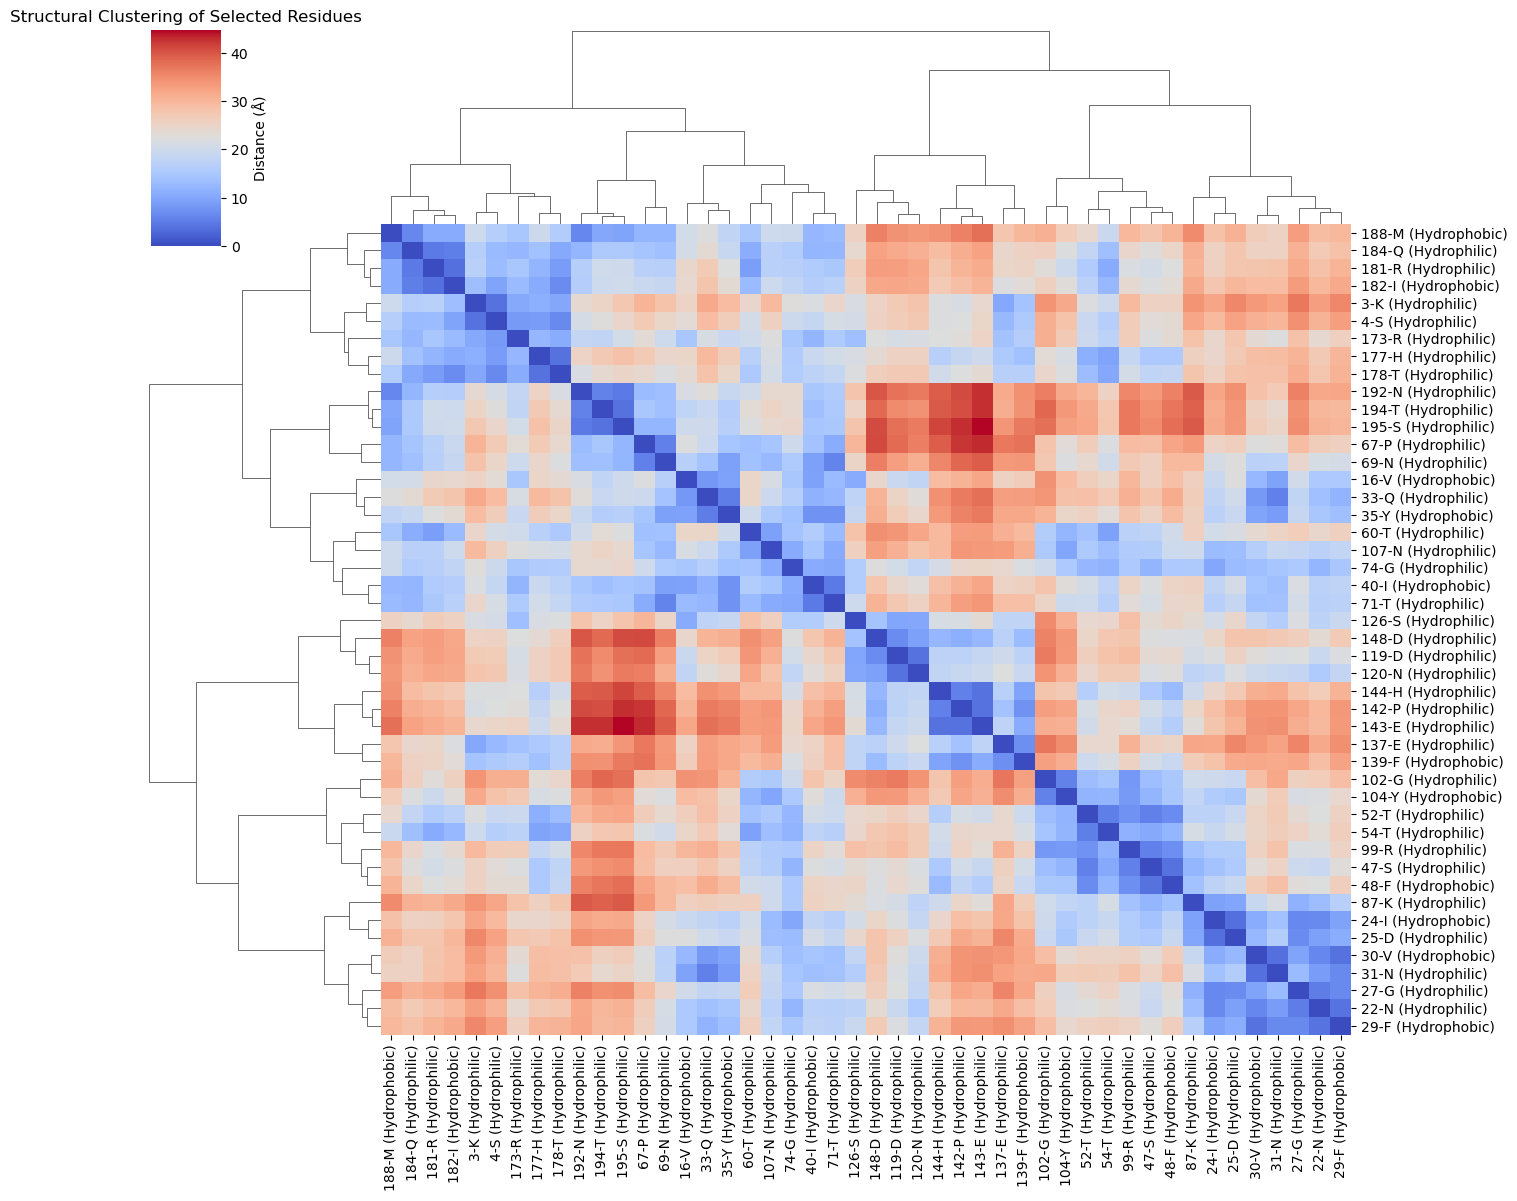

In [6]:
import csv
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Define residue classes
hydrophobic = {'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'}
hydrophilic = {'R', 'N', 'D', 'Q', 'E', 'K', 'S', 'T', 'C', 'H', 'G', 'P'}

# Define a function to get C-alpha coordinates
def get_residue_ca_coord(structure, chain_id, res_id):
    """Extract the C-alpha (CA) coordinate of a given residue."""
    try:
        residue = structure[0][chain_id][res_id]
        ca_atom = residue['CA']
        return np.array(ca_atom.coord)
    except KeyError:
        print(f"Residue {res_id} not found or does not have a CA atom.")
        return None

# Load the PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Define chain ID (update as needed)
chain_id = 'X'

# Extract pairwise distances for selected residues
residue_coords = []
labels = []
for pos, human_res, mouse_res in selected_residues:
    coord = get_residue_ca_coord(structure, chain_id, pos)
    if coord is not None:
        residue_coords.append(coord)
        hydrophobicity = "Hydrophobic" if mouse_res in hydrophobic else "Hydrophilic"
        labels.append(f"{pos}-{mouse_res} ({hydrophobicity})")

# Compute pairwise distances
distance_matrix = squareform(pdist(residue_coords))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a clustered heatmap
sns.clustermap(
    pd.DataFrame(distance_matrix, index=labels, columns=labels),
    row_linkage=linkage_matrix,
    col_linkage=linkage_matrix,
    cmap="coolwarm",
    cbar_kws={'label': 'Distance (Å)'},
    figsize=(14, 12)
)
plt.title("Structural Clustering of Selected Residues")
plt.show()
